# Optimal Number of Doctors
### Maxime Bouthillier

In [69]:
# Importing Libraries
import numpy as np
import math
import time
from matplotlib import pyplot as plt

In [70]:
# Simulation Function
def simulation(doctors, Trials): 
    start = time.time()
        
    '''
    This function will perform one simulation based on the described clinic parameters
    '''
    
    x = doctors*540                  
    profits = [0]*Trials        
    costs = [0]*Trials
        
    for j in range(Trials):
            
        idle_cost = 0
        profit = 0

        # Creation of the client frquency distribution
        ha = np.random.negative_binomial(0.64, 0.02)*60         # Hour Appointments        
        hha = np.random.poisson(45)*30                          # Half-hour Appointments
    
        if ha >= x: 
            profit += doctors*100*9
            idle_cost += 0
    
        else:
            profit += (ha/60)*100 
            y = x - ha

            if hha >= y:
                profit += (y/30)*55
            else:
                profit += (hha/30)*55
                z = y - hha
                idle_cost += z*2
            
        profits[j] = profit
        costs[j] = idle_cost

    # Calculating summary statistics
    avg_gp = (sum(profits) - sum(costs))/Trials 
    for k in range(Trials): 
        gp = profits[k] - costs[k]
        j =+ (gp-avg_gp)*(gp-avg_gp)
        
    se = (math.sqrt(j/(Trials-1)))/math.sqrt(Trials)
    avg_cost= sum(costs)/Trials
    avg_profit = sum(profits)/Trials
    idletime = avg_cost/120

    print("Simulation execution time: %3.2f Seconds" %(time.time() -start))
    return(avg_gp, se, avg_cost, avg_profit, idletime)

In [71]:
# Initializing Simulation parameters
numofdocs = 12
trials = 1000000
results = np.zeros([6, numofdocs-1])

for i in range(1,numofdocs):
    results[0,i-1] = i
    results[1:,i-1] = simulation(i, trials)

Simulation execution time: 1.14 Seconds
Simulation execution time: 1.14 Seconds
Simulation execution time: 1.16 Seconds
Simulation execution time: 1.21 Seconds
Simulation execution time: 1.18 Seconds
Simulation execution time: 1.19 Seconds
Simulation execution time: 1.19 Seconds
Simulation execution time: 1.18 Seconds
Simulation execution time: 1.18 Seconds
Simulation execution time: 1.18 Seconds
Simulation execution time: 1.18 Seconds



Optimal number of doctors: 4
This will yeild an average daily gross profit of $2856.62

The Standard Error is of $0.0010 
The lower confidence interval at 95% is $2856.6217
The upper confidence interval at 95% is $2856.6256

There is an average idle time of approximately 4 hours
Idle cost inccured is averaged at $477.25

Total number of simulations performed:  12,000,000


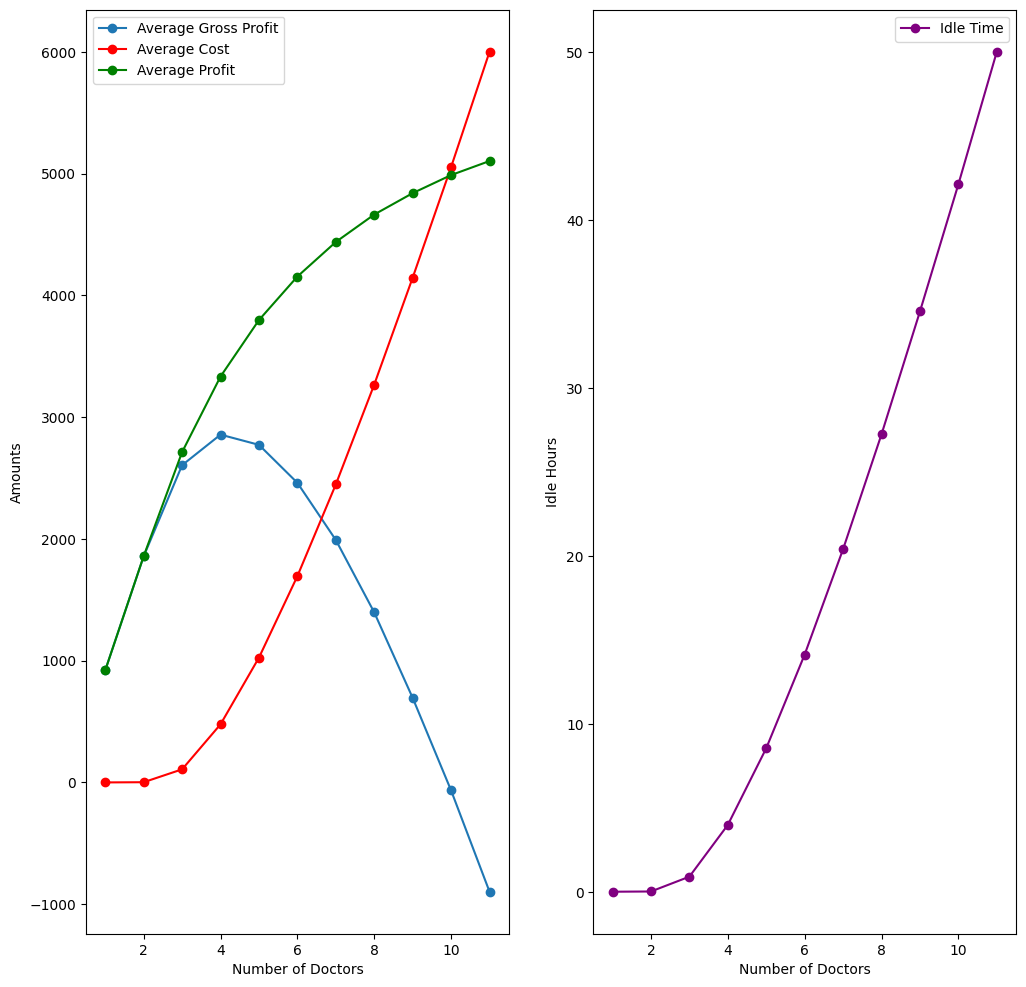

In [72]:
# Creation of dictionaries to find optimal number of doctors and related stats
Dic = {results[1,i]: results[0,i] for i in range(numofdocs-1)}
Dic2 = {results[1,i] : results[2,i] for i in range(numofdocs-1)}
Dic3 = {results[1,i] : results[3,i] for i in range(numofdocs-1)}

max_avg_gp = results[1,:].max()

# Output 
print("")
print("Optimal number of doctors: %1.0f" % Dic[max_avg_gp])
print("This will yeild an average daily gross profit of $%0.2f" % max_avg_gp)
print("")
print("The Standard Error is of $%0.4f " % Dic2[max_avg_gp])
print("The lower confidence interval at 95%% is $%2.4f" %(max_avg_gp -  1.96*(Dic2[max_avg_gp])))
print("The upper confidence interval at 95%% is $%2.4f" %(max_avg_gp + 1.96*(Dic2[max_avg_gp])))
print("")
print("There is an average idle time of approximately %1.0f" %(Dic3[max_avg_gp]/120), "hours")
print("Idle cost inccured is averaged at $%0.2f" %(Dic3[max_avg_gp]))
print('')
print('Total number of simulations performed: ', f'{numofdocs*trials:,}')


# plot of results
fig, ax = plt.subplots(1, 2, figsize=(12, 12))
ax[0].set_xlabel("Number of Doctors")
ax[0].set_ylabel("Amounts")
ax[0].plot(range(1,len(results[0,:])+1), results[1,:], linestyle ='-', marker= 'o', label='Average Gross Profit')
ax[0].plot(range(1,len(results[0,:])+1), results[3,:], linestyle ='-', marker= 'o', color='red', label='Average Cost')
ax[0].plot(range(1,len(results[0,:])+1), results[4,:], linestyle ='-', marker= 'o', color='green', label='Average Profit')
ax[0].legend()

ax[1].set_xlabel("Number of Doctors")
ax[1].set_ylabel("Idle Hours")
ax[1].plot(range(1,len(results[0,:])+1), results[5,:], linestyle ='-', marker= 'o', color='purple', label='Idle Time')
ax[1].legend()

plt.show()